# Importing the required libabries

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



# Loading the data

In [2]:
# Assuming data is already loaded and preprocessed as per the initial code
data = pd.read_csv('Responses.csv')
data = pd.concat([data["class"],data["response_text"]], axis = 1)


# Removing the null values

In [3]:
data.dropna(axis=0, inplace =True)
data.head(10)

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
5,not_flagged,a couple of years ago my friends was going to ...
6,flagged,Roommate when he was going through death and l...
7,flagged,i've had a couple of friends (you could say mo...
8,not_flagged,Listened to someone talk about relationship tr...
9,flagged,I will always listen. I comforted my sister wh...


# Changed the categoral to binary values

In [4]:

data["class"] = [1 if each == "flagged" else 0 for each in data["class"]]
data.head()

,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...


# Preprocessing the whole corpus

In [5]:
# Preprocessing All Text Data
# Cleaning, tokenizing, and lemmatizing the entire text corpus
description_list = []
for description in data.response_text:
    description = re.sub("[^a-zA-Z]", " ", description)
    description = description.lower()

    description = nltk.word_tokenize(description)
    description = [word for word in description if not word in set(stopwords.words("english"))]  # Removing stop words

    lemmatizer = WordNetLemmatizer()
    description = (
        lemmatizer.lemmatize(
            lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"), pos="v"), pos="a"
        )
        for word in description
    )

    description = " ".join(description)
    description_list.append(description)

# Visualizing the data

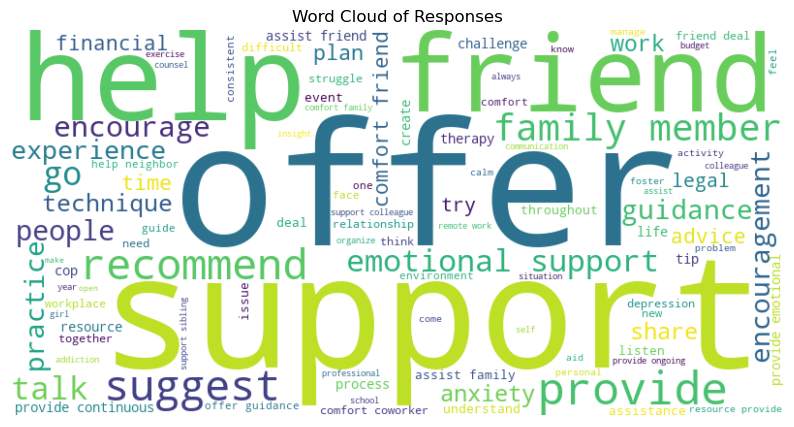

In [6]:
# Visualizing Word Frequency
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all descriptions into a single string for word frequency analysis
all_text = ' '.join(description_list)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Responses')
plt.show()


C:\Users\prath\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prath\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\prath\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


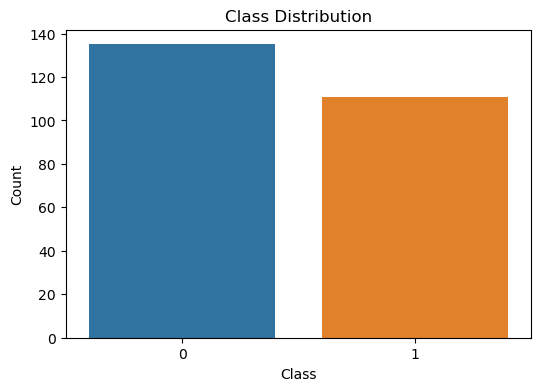

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



# TF-IDF Vectorization

In [8]:

max_features = 100
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
sparse_matrix_tfidf = tfidf_vectorizer.fit_transform(description_list).toarray()


# Splitting the data

In [9]:

y = data.iloc[:, 0].values
x = sparse_matrix_tfidf
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing the classifiers

In [10]:

classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression()
}


# Training and evaluating each classifier

In [11]:

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc}")

Random Forest Accuracy: 0.84
SVM Accuracy: 0.84
Logistic Regression Accuracy: 0.84
